In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

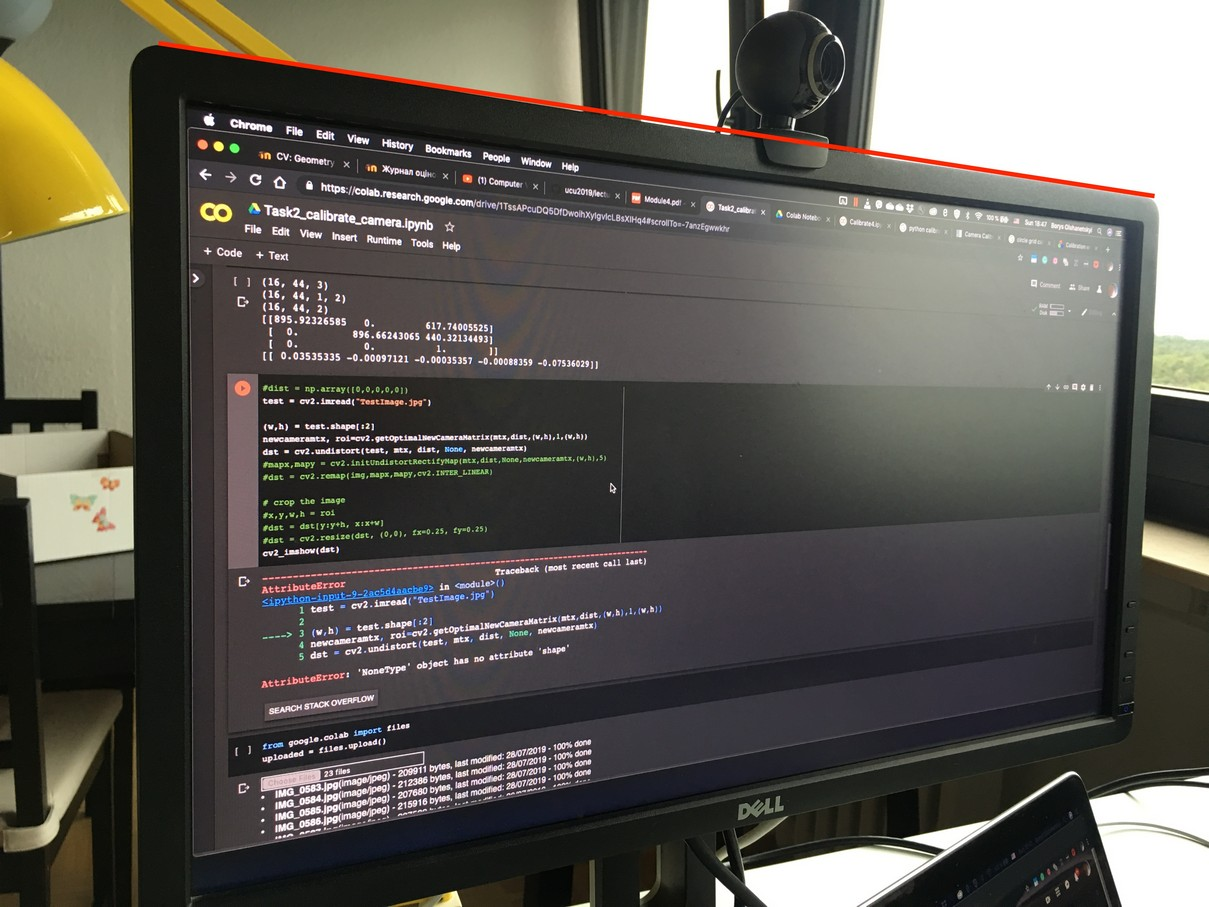

In [0]:
#lets find image with distortion
cv2_imshow(cv2.imread("TestImage_line_1.jpg"))

**As is could be seen there is "barrel" over the top of the monitor, let's try to fix it.**

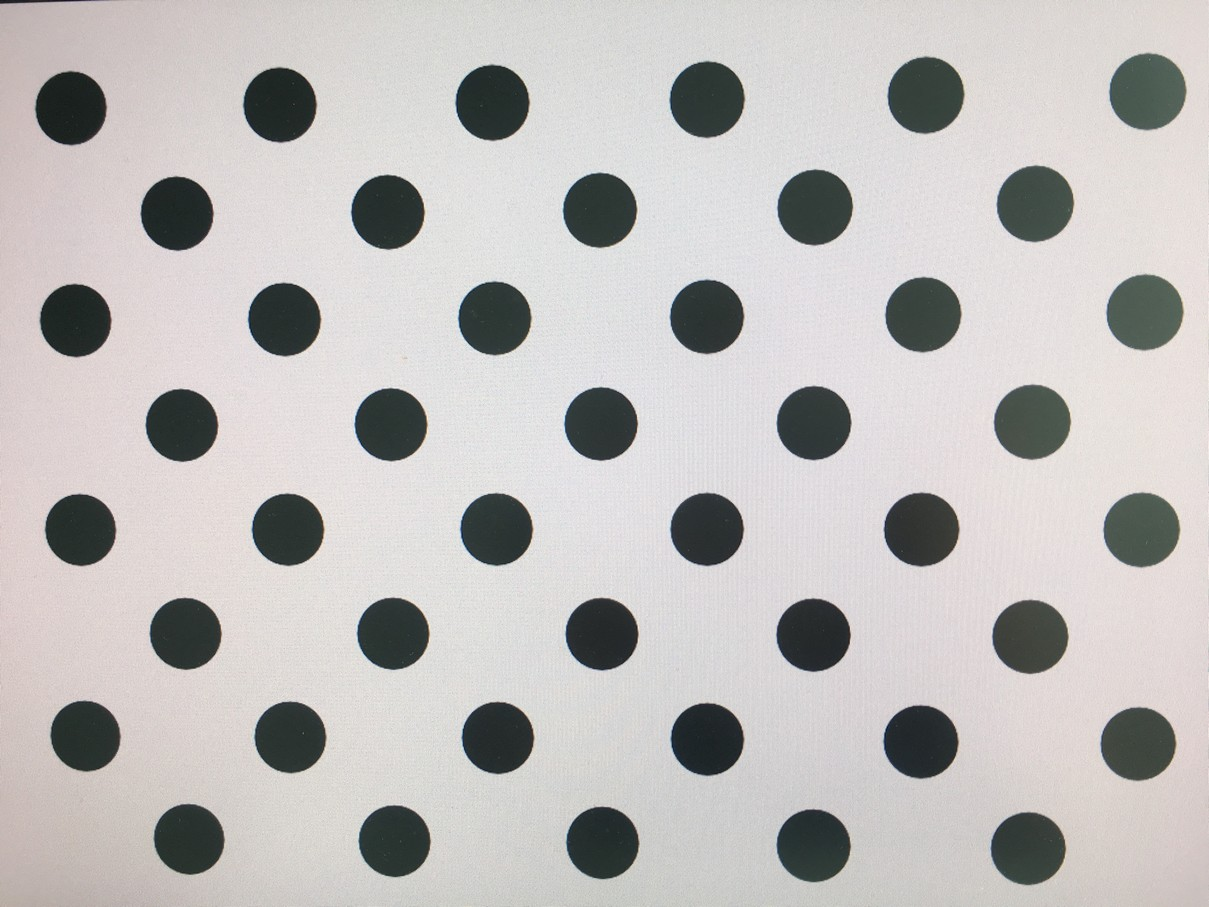

In [0]:
#browse calibration sample image
cv2_imshow(cv2.imread("IMG_0583.jpg"))

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 1364   # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 6000   # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)


In [0]:
objpoints = None # 3d point in real world space
imgpoints = None # 2d points in image plane.
MAGIC_FILE_NUMBER = 583
for f in range(1,17):
  image_name = "IMG_0{}.jpg".format(f + MAGIC_FILE_NUMBER)
  img = cv2.imread(image_name)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #keypoints = blobDetector.detect(gray)
  #im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  ret, corners = cv2.findCirclesGrid(gray, (4,11),
                        flags = cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
                                     blobDetector = blobDetector)   # Find the circle grid
  #cv2_imshow(im_with_keypoints)
  #print(keypoints)
  if corners is not None and ret:
    objpoints = np.array([objp]) if objpoints is None else np.append(objpoints, [objp], axis = 0)
    imgpoints = np.array([corners]) if imgpoints is None else np.append(imgpoints, [corners], axis = 0)
  else:
    print("Skip {}".format(image_name))


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape;
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)
  
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)



(16, 44, 3)
(16, 44, 1, 2)
(16, 44, 2)
[[895.92326585   0.         617.74005525]
 [  0.         896.66243065 440.32134493]
 [  0.           0.           1.        ]]
[[ 0.03535335 -0.00097121 -0.00035357 -0.00088359 -0.07536029]]


In [0]:

objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
  for y in range(0, 4):
    objp[4*x+y] = (x*36, y*72 + (x%2)*36, 0)


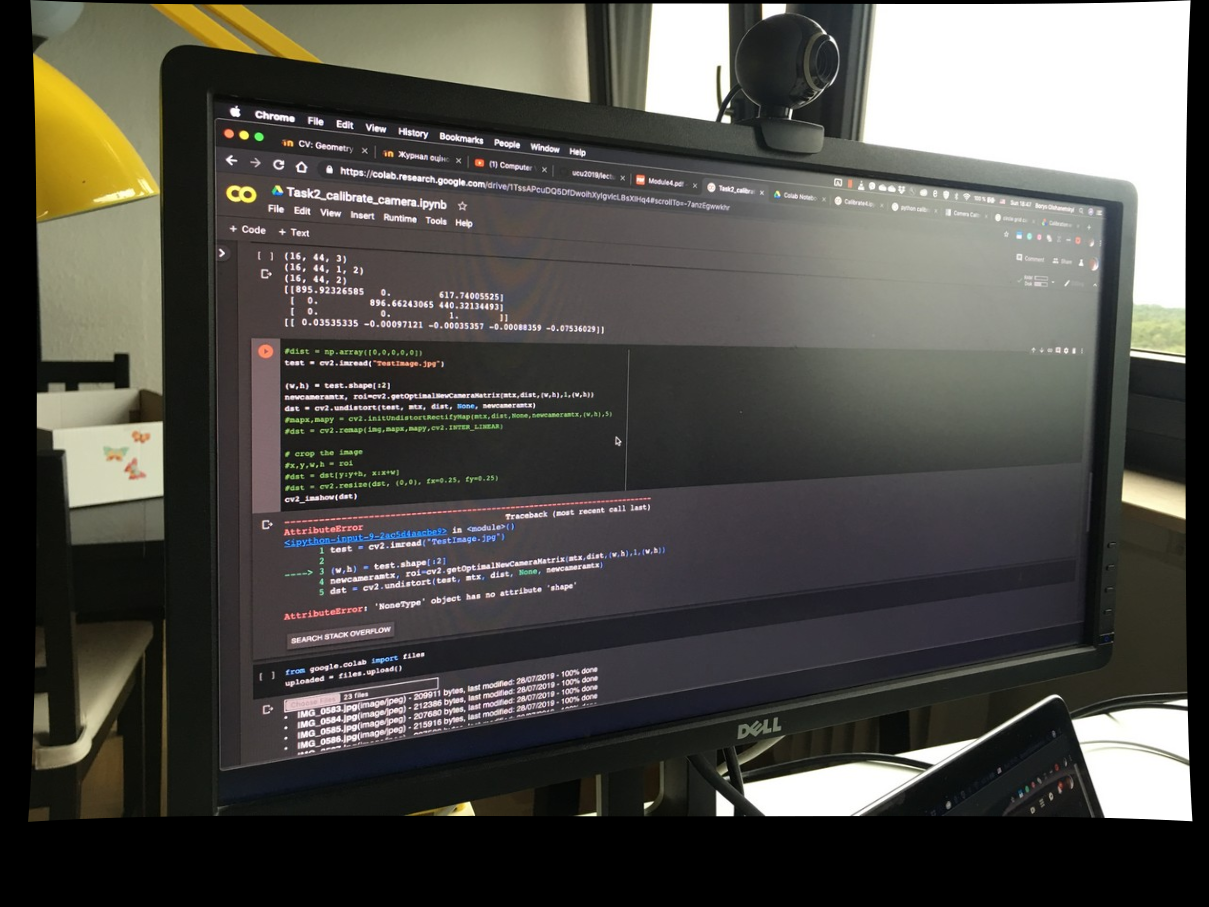

In [0]:
test = cv2.imread("TestImage_1.jpg")

(w,h) = test.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
cv2_imshow(dst)

**As it's hard to notice difference by naked eye, I've downloaded undistorted image and added the blue line manually. Let's compare those two images:**

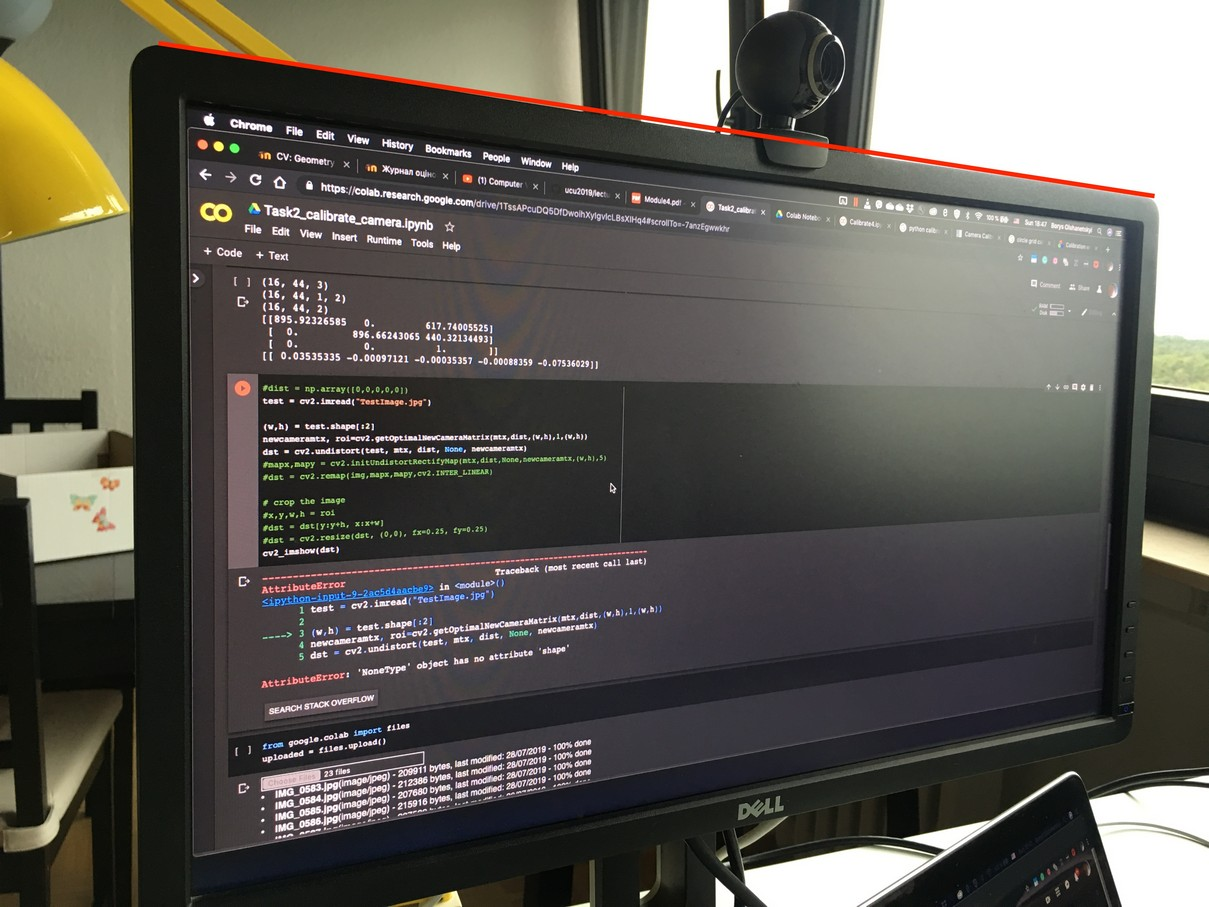

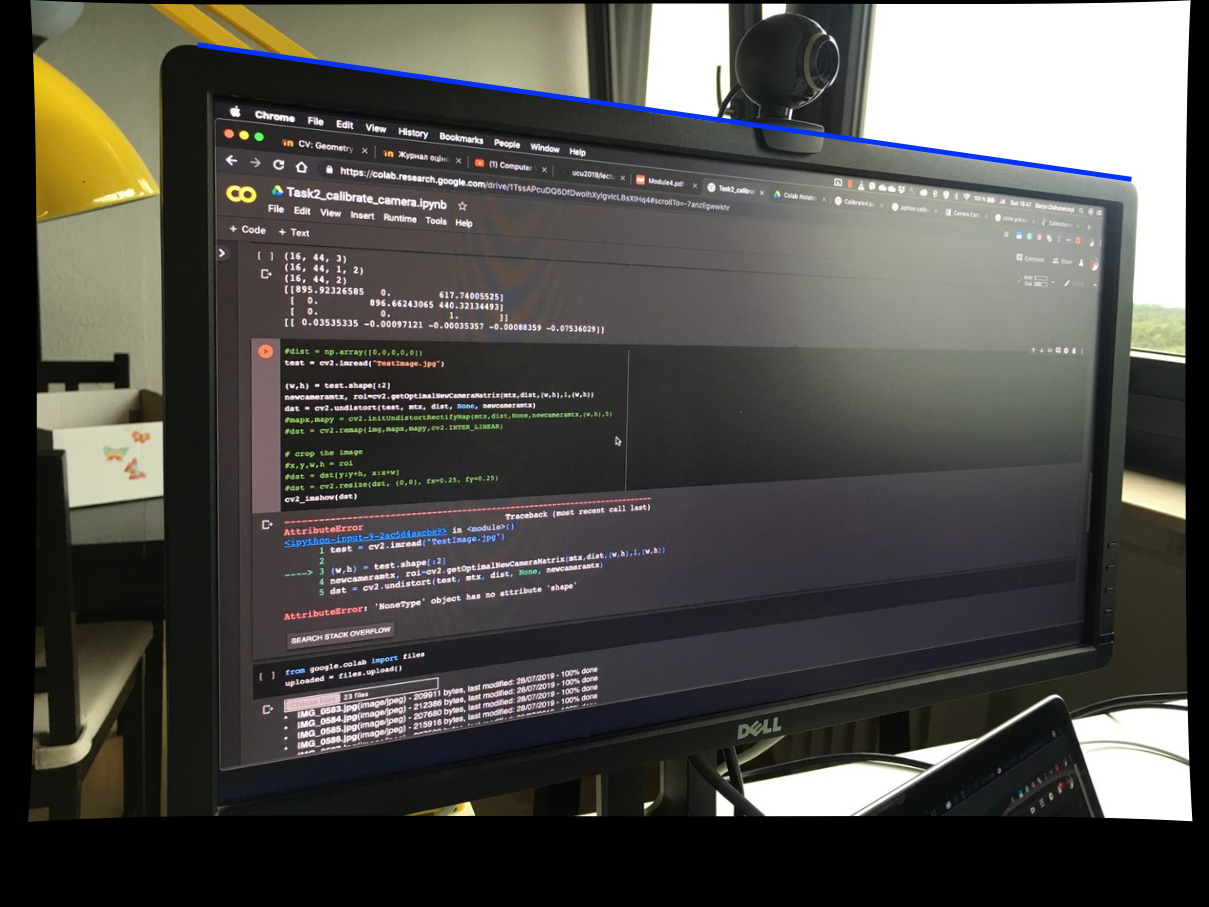

In [0]:
cv2_imshow(cv2.imread("TestImage_line_1.jpg"))
cv2_imshow(cv2.imread("result.png"))

## Conclusion
We were able successfully to fix distortion existing on camera, using calibration method with circular pattern.

In [0]:
from google.colab import files
uploaded = files.upload()